* The basic features of the PennyLane library like Importing packages, Creating Quantum functions, Optimization and Gradients can be learnt from here:    
[Basic tutorial](https://pennylane.ai/qml/demos/tutorial_qubit_rotation.html)  
[Gaussian Transformation](https://pennylane.ai/qml/demos/tutorial_gaussian_transformation.html)  
[Plugins and Hybrid computation](https://pennylane.ai/qml/demos/tutorial_plugins_hybrid.html)  
* Let us see how we can use PennyLane library to execute some popular Quantum Machine Learning Models

## 1) Variational Classifier  
* Variational Quantum Classifiers are quantum circuits that can be trained from labelled data to classify new data samples  
* The architecture of the Variationl Classifier in PennyLane is inspired by the following works: [Farhi and Neven (2018)](https://arxiv.org/abs/1802.06002) and [Schuld et al. (2018)](https://arxiv.org/abs/1804.00633)    
* [Variational Classifier](https://pennylane.ai/qml/demos/tutorial_variational_classifier.html): PennyLane library shows how the quantum variational classifier can reproduce the parity function  


**Parity Function**   
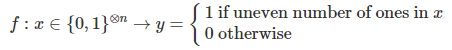  
  
Let us look at some basic functions and concepts which will be used frequently in QML
### 1.1)  Encoding binary inputs into the initial state of the variational circuit  
We can encode a list of binary inputs into a state vector for a quantum circuit using the [BasisState](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.BasisState.html) function   


In [6]:
x = [1, 0, 0]
def statepreparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

### 1.2) **Layer**  
* Variational classifiers usually define a *layer* or *block*, which is an elementary circuit architecture that gets repeated to build the variational circuit.  
* After defining a Quantum Device, we write the Layer function and build a quantum circuit using them 

In [ ]:
#Building a circuit using Layer 
@qml.qnode(dev)
def circuit(weights, x=None):

    statepreparation(x)                       

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))

### 1.3) **Cost**  
In supervised learning, the cost function is usually the sum of a loss function and a regularizer. We use the standard square loss that measures the distance between target labels and model predictions.

In [ ]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss


### 1.4) **Accuracy**  
Accuracy is defined to monitor how many inputs the current classifier predicted correctly, given target labels and model predictions.

In [ ]:
def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

## Function fitting with a quantum neural network  
* [Function fitting with a quantum neural network](https://pennylane.ai/qml/demos/quantum_neural_net.html) shows how a variational circuit can be used to learn a fit for a one-dimensional function when being trained with noisy samples from that function.  
* The variational circuit we use is the continuous-variable quantum neural network model as described in [Killoran et al. (2018)](https://arxiv.org/abs/1806.06871)  
* The device [Strawberry Fields simulator](https://strawberryfields.readthedocs.io/en/stable/introduction/introduction.html) is used. You would have to [install](https://strawberryfields.readthedocs.io/en/stable/_static/install.html?version=stable) the Strawberry Fields plugin for PennyLane  
* As an objective we take the **square loss** between target labels and model predictions.



In [ ]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In the cost function, we compute the outputs from the variational circuit. Function fitting is a regression problem, and we interpret the expectations from the quantum node as predictions

In [ ]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x=x) for x in features]
    return square_loss(labels, preds)

**Steps Followed**  
* We first examine the data and then use the [Adam](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.AdamOptimizer.html) Optimizer to update the weights for n number of steps. More steps would lead to a better fit.  
* Then, we collect the predictions of the trained model for 50 values in the range [-1,1] and plot the shape of the function that the model has “learned” from the noisy data. 

In [ ]:
from pennylane.optimize import AdamOptimizer
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)
def opt() :
    var = var_init
    for it in range(500):
        var = opt.step(lambda v: cost(v, X, Y), var)
        print("Iter: {:5d} | Cost: {:0.7f} ".format(it + 1, cost(var, X, Y)))

As found in the simulation done in PennyLane, the following is a comparison of a sine curve before and after fitting 
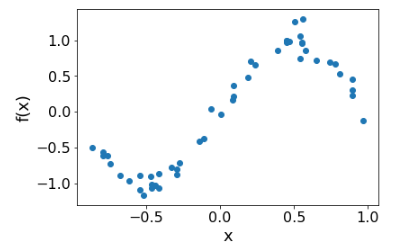  

The green dots represent the data of noise removal after 500 iterations  
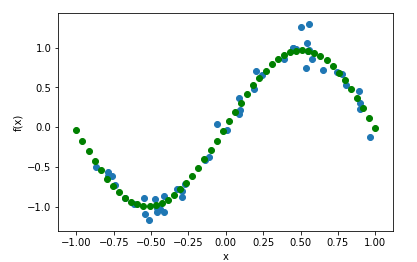

## Quantum Transfer Learning   
* [Transfer learning](https://en.wikipedia.org/wiki/Transfer_learning#:~:text=Transfer%20learning%20(TL)%20is%20a,when%20trying%20to%20recognize%20trucks.) (TL) is a well-established technique for training artificial neural networks, which is based on the general intuition that if a pre-trained network is good at solving a given problem, then, with just a bit of additional training, it can be used to also solve a different but related problem.  
* For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.  
* You can use the following resources to learn more about TL: [Tutorial on transfer learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) and the research paper [Mari et al. (2019)](https://arxiv.org/abs/1912.08278)  
* You are required to use the [PyTorch](https://pytorch.org/get-started/locally/#mac-anaconda) interface in PennyLane for this model.* 

The basic idea of Transfer learning can be depicted through the following sketch  
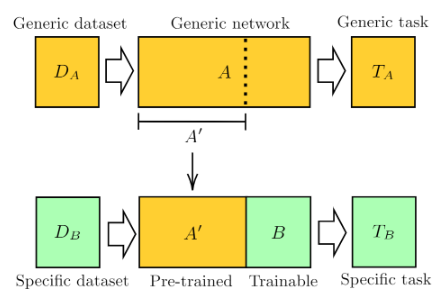

**Classical-Quantum Transfer Learning scheme is discussed below:**  
* First, we use a pre-trained network A  
* After removing its final layer we obtain A', a pre-processing block which maps any input high-resolution image into 512 abstract features.  
* Such features are classified by a 4-qubit “dressed quantum circuit” B, i.e., a variational quantum circuit sandwiched between two classical layers.  
* The hybrid model is trained, keeping A′ constant, on the dataset 
A representation of processing the dataset and classifying bee and ants' classes is shown below  
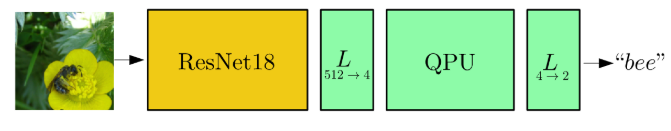  
The circuit set-up, data-set loading, training and predicting class can be understood from the PennyLane demo of [Quantum Transfer Learning](https://pennylane.ai/qml/demos/tutorial_quantum_transfer_learning.html)

## Quantum embeddings and metric learning  
* [Embedding] is a relatively low-dimensional space into which you can translate high-dimensional vectors. Embeddings make it easier to do machine learning on large inputs.  
* Quantum metric learning trains a quantum embedding—for example, a quantum circuit that encodes classical data into quantum states—to separate different classes of data in the Hilbert space of the quantum system.  
* The trained embedding can be used for classification. A new data sample (red dot) gets mapped into Hilbert space via the same embedding, and a special measurement compares it to the two embedded classes. The decision boundary of the measurement in quantum state space is nearly linear (red dashed line).
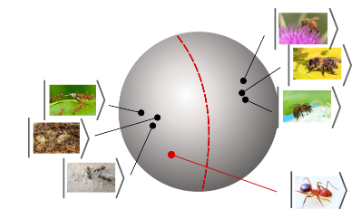


Other models such as [Quantum Generative Adversarial Networks](https://pennylane.ai/qml/demos/tutorial_QGAN.html), [Ensemble classification](https://pennylane.ai/qml/demos/tutorial_ensemble_multi_qpu.html), [Quanvolutional Neural Networks](https://pennylane.ai/qml/demos/tutorial_quanvolution.html) and [Multiclass margin classifier](https://pennylane.ai/qml/demos/tutorial_multiclass_classification.html) can be studied from [QML Demos](https://pennylane.ai/qml/demonstrations.html)